# NBA Clustering based on advanced stats

## Importing stats:

In [2]:
shooting_names = ['Player', 'Team', 'AGE', 'FGM LESS THAN 5FT.', 'FGA LESS THAN 5FT.',\
       'FG% LESS THAN 5FT.', 'FGM 5-9 FT.', 'FGA 5-9 FT.', 'FG% 5-9 FT.',\
       'FGM 10-14 FT.', 'FGA 10-14 FT.', 'FG% 10-14 FT.', 'FGM 15-19 FT.',\
       'FGA 15-19 FT.', 'FG% 15-19 FT.', 'FGM 20-24 FT.', 'FGA 20-24 FT.',\
       'FG% 20-24 FT.', 'FGM 25-29 FT.', 'FGA 25-29 FT.', 'FG% 25-29 FT.']
passing_names = ['Player', 'Team', 'PASSES MADE', 'PASSES RECEIVED', 'SECONDARY AST',\
       'POTENTIAL AST', 'AST ADJ', 'AST to PASS% ADJ']
drives_names = ['PLAYER', 'TEAM', 'DRIVES']
touches_names = ['PLAYER', 'TEAM', 'TOUCHES', 'FRONT CT TOUCHES', 'TIME OF POSS',\
       'AVG SEC PER TOUCH', 'AVG DRIB PER TOUCH', 'PTS PER TOUCH',\
       'ELBOW TOUCHES', 'POST UPS', 'PAINT TOUCHES', 'PTS PER ELBOW TOUCH',\
       'PTS PER POST TOUCH', 'PTS PER PAINT TOUCH']
speed_names = ['PLAYER', 'TEAM', 'DIST. FEET', 'DIST. MILES', 'DIST. MILES OFF',\
       'DIST. MILES DEF', 'AVG SPEED', 'AVG SPEED OFF', 'AVG SPEED DEF']

In [101]:
import pandas as pd
#reading in all the data
stats = pd.read_csv("stats/NBA_stats_BR.csv").drop(["Unnamed: 19", "Unnamed: 24", "Pos", "Age", "Rk",], axis = 1)
stats.Player = stats.Player.replace(regex = r"\\.+",value ="")
stats = stats.set_index(["Player"])
totals = pd.read_csv("stats/NBA_totals_BR.csv").drop(["Rk", "Age", "G", "MP"], axis=1)
totals.Player = totals.Player.replace(regex = r"\\.+",value ="")
totals = totals.set_index(["Player"])
pos = totals.Pos
shooting = pd.read_csv("stats/shooting_zones_NBA.csv", names = shooting_names).drop(["AGE"], axis =1).set_index(["Player"])
passing = pd.read_csv("stats/passing_NBA.csv", names = passing_names).set_index(["Player"])
drives = pd.read_csv("stats/Drives_NBA.csv", names = drives_names).set_index(["PLAYER"])
touches = pd.read_csv("stats/touches_NBA.csv", names = touches_names).set_index(["PLAYER"])
speed = pd.read_csv("stats/speed_NBA.csv", names = speed_names).set_index(["PLAYER"])

#merging everything into 1 table
merged = pd.merge(stats,totals, left_index=True, right_index=True, how = "inner")
merged = pd.merge(merged,shooting, left_index=True, right_index=True, how = "left")
merged = pd.merge(merged,passing, left_index=True, right_index=True, how = "left")
merged = pd.merge(merged,drives, left_index=True, right_index=True, how = "left")
merged = pd.merge(merged,touches, left_index=True, right_index=True, how = "left")
merged = pd.merge(merged,speed, left_index=True, right_index=True, how = "left")

#filtering out players that didn't play much
merged = merged[(merged.G>41)&(merged.MP>1000)]
#dropping irrelevant fields
merged = merged.drop(["GS","Pos", "G", "MP", "TS%", "Tm_y", "Tm_x", "Team_x", "Team_y", "TEAM_x", "TEAM_y", "TEAM"],axis=1)
merged = merged[["3PAr","FTr","ORB%", "DRB%", "AST%","STL%","BLK%", "USG%","OBPM","DBPM", "3P%", "2P%", 'FGA LESS THAN 5FT.','FGA 5-9 FT.', 'FGA 10-14 FT.','FGA 15-19 FT.', 'FGA 20-24 FT.', 'FGA 25-29 FT.', "PASSES MADE", "PASSES RECEIVED", "SECONDARY AST",\
                'AST to PASS% ADJ','DRIVES', 'TOUCHES','FRONT CT TOUCHES', 'AVG SEC PER TOUCH','AVG DRIB PER TOUCH', 'PTS PER TOUCH', 'ELBOW TOUCHES', 'POST UPS',\
       'PAINT TOUCHES','PTS PER ELBOW TOUCH', 'PTS PER POST TOUCH','PTS PER PAINT TOUCH', 'DIST. MILES OFF', 'DIST. MILES DEF','AVG SPEED', 'AVG SPEED OFF', 'AVG SPEED DEF' ]]
#Feature Engineering
merged['POST UP %'] = merged['POST UPS'].astype(float)/merged['TOUCHES'].astype(float)
merged['FRONT CT TOUCH %'] = merged['FRONT CT TOUCHES'].astype(float)/merged['TOUCHES'].astype(float)
merged['PAINT TOUCH %'] = merged['PAINT TOUCHES'].astype(float)/merged['TOUCHES'].astype(float)
merged['ELBOW TOUCH %'] = merged['ELBOW TOUCHES'].astype(float)/merged['TOUCHES'].astype(float)
merged['SPEED DIFF'] = merged['AVG SPEED OFF'].astype(float)-merged['AVG SPEED DEF'].astype(float)
merged['MILES DIFF'] = merged['DIST. MILES OFF'].astype(float)-merged['DIST. MILES DEF'].astype(float)
merged['PASS RATIO'] = merged["PASSES MADE"].astype(float)/merged["PASSES RECEIVED"].astype(float) #pass made / passes received
merged['FGA TOTAL'] = merged['FGA LESS THAN 5FT.'].astype(float)+merged['FGA 5-9 FT.'].astype(float)+merged['FGA 10-14 FT.'].astype(float)+merged['FGA 15-19 FT.'].astype(float)+merged['FGA 20-24 FT.'].astype(float)+merged['FGA 25-29 FT.'].astype(float)
merged['FGA <5 FT. RATIO'] = merged['FGA LESS THAN 5FT.'].astype(float)/merged['FGA TOTAL'].astype(float)
merged['FGA 5-9 FT. RATIO'] = merged['FGA 5-9 FT.'].astype(float)/merged['FGA TOTAL'].astype(float)
merged['FGA 10-14 FT. RATIO'] = merged['FGA 10-14 FT.'].astype(float)/merged['FGA TOTAL'].astype(float)
merged['FGA 15-19 FT. RATIO'] = merged['FGA 15-19 FT.'].astype(float)/merged['FGA TOTAL'].astype(float)
merged['FGA 20-24 FT. RATIO'] = merged['FGA 20-24 FT.'].astype(float)/merged['FGA TOTAL'].astype(float)
merged['FGA 25-29 FT. RATIO'] = merged['FGA 25-29 FT.'].astype(float)/merged['FGA TOTAL'].astype(float)
merged = merged.dropna().drop(['FGA TOTAL','FGA LESS THAN 5FT.','FGA 5-9 FT.','FGA 10-14 FT.', 'FGA 15-19 FT.', 'FGA 20-24 FT.', 'FGA 25-29 FT.', "SECONDARY AST", "PASSES MADE", "PASSES RECEIVED", 'TOUCHES','FRONT CT TOUCHES', 'PAINT TOUCHES', 'ELBOW TOUCHES',"POST UPS", 'AVG SPEED DEF', 'AVG SPEED OFF', 'DIST. MILES OFF', 'DIST. MILES DEF'], axis =1)
merged.shape
merged.columns

Index(['3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'USG%', 'OBPM',
       'DBPM', '3P%', '2P%', 'AST to PASS% ADJ', 'DRIVES', 'AVG SEC PER TOUCH',
       'AVG DRIB PER TOUCH', 'PTS PER TOUCH', 'PTS PER ELBOW TOUCH',
       'PTS PER POST TOUCH', 'PTS PER PAINT TOUCH', 'AVG SPEED', 'POST UP %',
       'FRONT CT TOUCH %', 'PAINT TOUCH %', 'ELBOW TOUCH %', 'SPEED DIFF',
       'MILES DIFF', 'PASS RATIO', 'FGA <5 FT. RATIO', 'FGA 5-9 FT. RATIO',
       'FGA 10-14 FT. RATIO', 'FGA 15-19 FT. RATIO', 'FGA 20-24 FT. RATIO',
       'FGA 25-29 FT. RATIO'],
      dtype='object')

In [102]:
#normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Data = scaler.fit_transform(merged)
norm_stats = pd.DataFrame(Data, index = merged.index, columns = merged.columns)

## Principal Components Analysis:

[ 0.3227463   0.1976368   0.08985263  0.06336804  0.04985228  0.04611161
  0.03082908  0.02386432  0.02193875  0.01967433  0.01520827  0.01400035
  0.01299402  0.01194171]
Percent of variance explained by all components: 0.920018486173


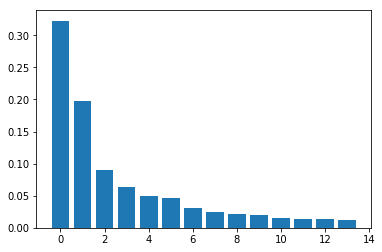

In [103]:
#Using PCA to identify components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=14)
pca.fit(norm_stats)
print(pca.explained_variance_ratio_)
print("Percent of variance explained by all components:", sum(pca.explained_variance_ratio_))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
results = pd.DataFrame(index = norm_stats.index)
PC = pd.DataFrame()
for i, component in enumerate(pca.components_):
    top_idx = np.argsort(np.absolute(component))[-5:]
    cols = np.flip(np.array(norm_stats.columns).take(top_idx),axis=0)
    x = np.flip(component.take(top_idx), axis=0)
    PC["PC"+str(i)] = cols+x.astype(str)
    results["PC"+str(i)]=np.dot(norm_stats, component)

In [112]:
#Recording the top and bottom players for each component
def top(x, k=30):
    return x.sort_values()[-k:].index
def bottom(x, k=10):
    return x.sort_values()[:k].index
def common(x):
    #print(pos[x].value_counts())
    #PC_Pos[] = pos[x].value_counts()[:3].index
    return (pos[x].value_counts()[:2].index)+"-("+pos[x].value_counts()[:2].astype(str)+")"
top10 = results.apply(top)
bot10 = results.apply(bottom)
print("Breaking down each PC by top 2 positions")
print(top10.apply(common))
#Number of players in each position
print("No. of players per position in my dataset:")
print(pos.value_counts())


Breaking down each PC by top 2 positions
      PC0      PC1      PC2      PC3      PC4     PC5     PC6     PC7  \
0  C-(26)  PG-(14)  SG-(15)  PG-(12)  SG-(10)  C-(10)  PG-(7)  SG-(9)   
1  PF-(4)    C-(9)    C-(6)  PF-(10)   SF-(8)  PG-(6)  SG-(7)   C-(7)   

       PC8     PC9     PC10    PC11     PC12     PC13  
0  PF-(14)  PG-(7)  PF-(11)  PF-(9)  SG-(12)  SG-(11)  
1   PG-(5)  SG-(7)   PG-(7)  PG-(7)  PG-(10)   PG-(7)  
No. of players per position in my dataset:
SG       128
PG       111
PF       105
C        105
SF        88
SF-SG      2
PG-SG      1
Name: Pos, dtype: int64


In [105]:
print("Top attributes in each principal component")
PC

Top attributes in each principal component


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,AVG DRIB PER TOUCH-0.35675654338242063,3PAr-0.35651563250969787,PTS PER TOUCH0.5510515693294142,FGA 15-19 FT. RATIO-0.5396704492894214,DRB%-0.31596602591264533,SPEED DIFF-0.5544819179558793,STL%0.448579090046186,FRONT CT TOUCH %0.3976447764093745,PTS PER ELBOW TOUCH0.5255379589667033,2P%-0.5312968154982536,PTS PER POST TOUCH0.47806311682486424,BLK%0.4633475368551889,PTS PER POST TOUCH0.6168751945737047,MILES DIFF-0.41214812521953315
1,AVG SEC PER TOUCH-0.3151283807453182,FGA 20-24 FT. RATIO-0.33117775111387737,USG%0.37440249962033,OBPM0.33379085622282273,FGA <5 FT. RATIO0.2884252935773221,AVG SPEED-0.42874397209512716,FGA 5-9 FT. RATIO-0.41492013245712567,FGA 5-9 FT. RATIO0.36587419349528816,FGA 5-9 FT. RATIO0.3405880978925214,FTr0.5192539646933477,STL%0.4095611437665715,MILES DIFF-0.3460990133808216,PTS PER PAINT TOUCH-0.4275897604048451,2P%-0.3469039054893451
2,ORB%0.27412371485459597,FGA 25-29 FT. RATIO-0.28392333227083516,FRONT CT TOUCH %0.3452332771033891,FGA 25-29 FT. RATIO0.3118947740819916,PTS PER ELBOW TOUCH0.28066856149014724,MILES DIFF-0.336342243589619,FGA 15-19 FT. RATIO0.4123031416265137,DBPM0.3398150265335645,FGA 15-19 FT. RATIO-0.2871753545621082,MILES DIFF0.2583374997090024,PTS PER ELBOW TOUCH-0.34356357837227625,FGA 20-24 FT. RATIO-0.30295343224538024,PTS PER ELBOW TOUCH0.3329796458940511,ORB%0.31196170714740834
3,PAINT TOUCH %0.23888005583892846,AVG SEC PER TOUCH0.28188597497329754,PTS PER PAINT TOUCH0.24021411829052733,2P%0.2505127153178409,MILES DIFF-0.27934200095904693,PTS PER ELBOW TOUCH-0.28058969862365474,DBPM0.3296483677691455,STL%0.3386504662419643,ELBOW TOUCH %-0.2724879480129193,AST%-0.2481532239298911,BLK%-0.33473393691573156,DRB%-0.28802142336770475,FTr-0.24755537130266372,DRB%0.2934665820391656
4,ELBOW TOUCH %0.23763918102727716,AVG DRIB PER TOUCH0.27745590505030215,PTS PER ELBOW TOUCH0.23856757966989092,3PAr0.2451835232818625,FGA 15-19 FT. RATIO-0.269004365223063,STL%0.2666553158199703,PTS PER ELBOW TOUCH0.24703282620595485,AVG SPEED0.2529462245922639,SPEED DIFF-0.23575785113001513,OBPM-0.21967689991975928,OBPM0.23482594633179887,FGA 25-29 FT. RATIO0.2725658490034969,POST UP %-0.20283015473355837,BLK%-0.2823037490351368


## Clustering based on reduced dimensions: (KMeans)

For n_clusters = 2 The average silhouette_score is : 0.238200680095
For n_clusters = 3 The average silhouette_score is : 0.238826122763
For n_clusters = 4 The average silhouette_score is : 0.189406589689
For n_clusters = 5 The average silhouette_score is : 0.168369690625
For n_clusters = 6 The average silhouette_score is : 0.144707156276
For n_clusters = 7 The average silhouette_score is : 0.133247536567
For n_clusters = 8 The average silhouette_score is : 0.136005363718
For n_clusters = 9 The average silhouette_score is : 0.128795275933
For n_clusters = 10 The average silhouette_score is : 0.137913078782
For n_clusters = 11 The average silhouette_score is : 0.139453363597
For n_clusters = 12 The average silhouette_score is : 0.128794345436
For n_clusters = 13 The average silhouette_score is : 0.114987719642
For n_clusters = 14 The average silhouette_score is : 0.111664418777
For n_clusters = 15 The average silhouette_score is : 0.112911526883


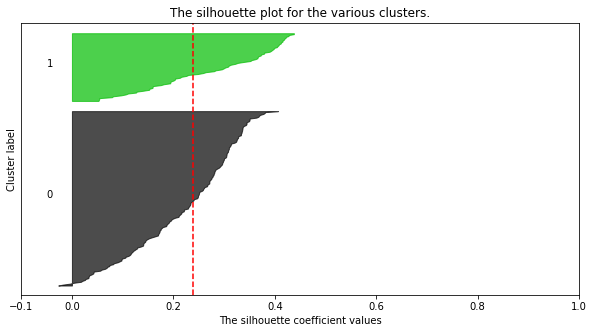

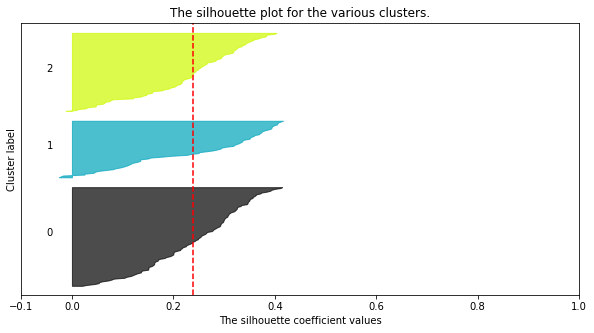

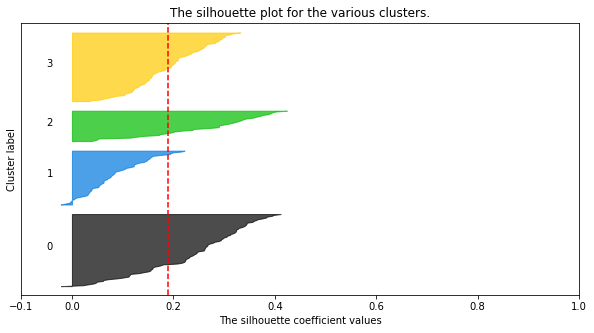

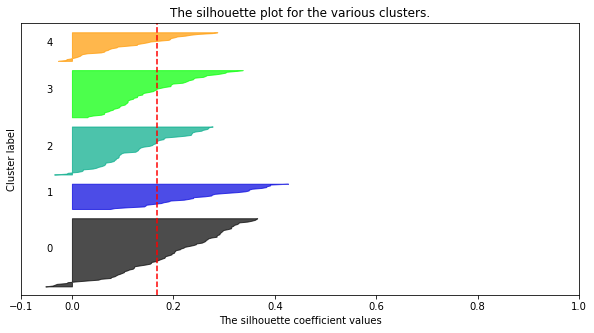

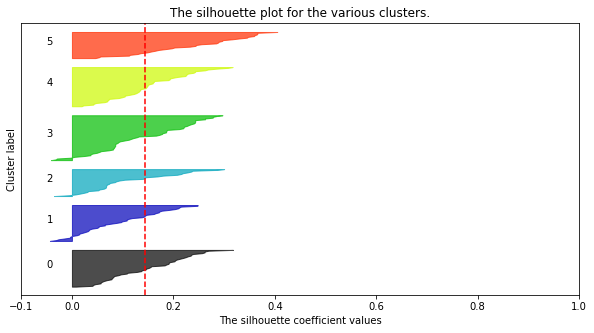

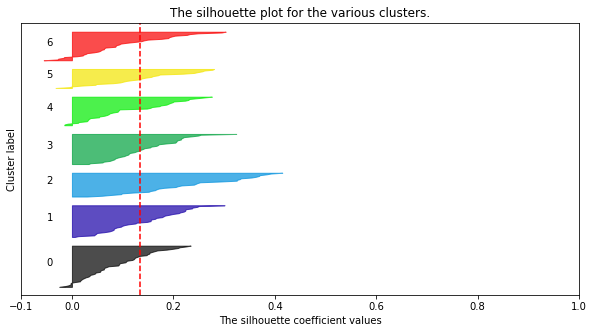

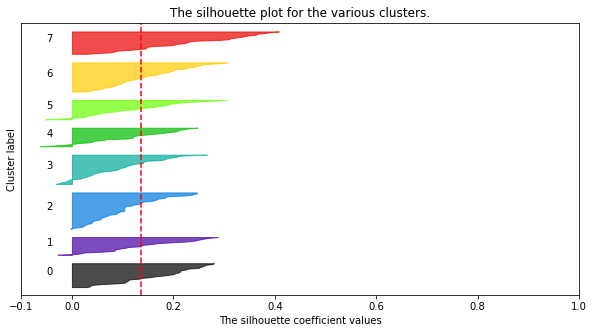

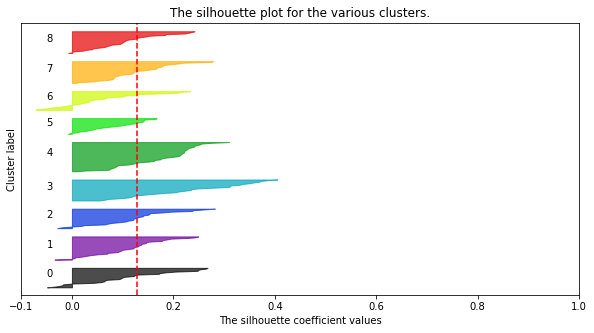

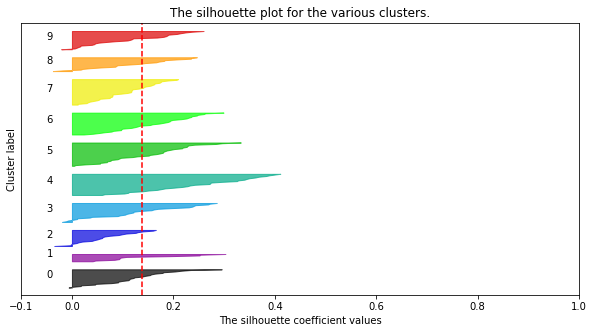

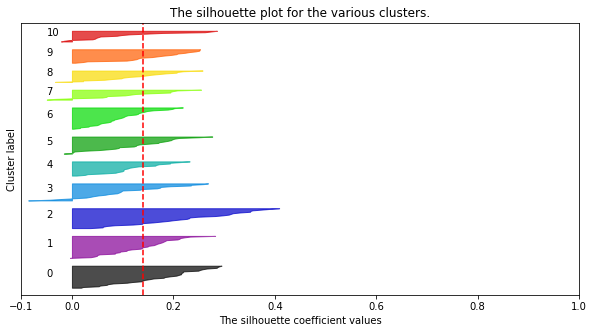

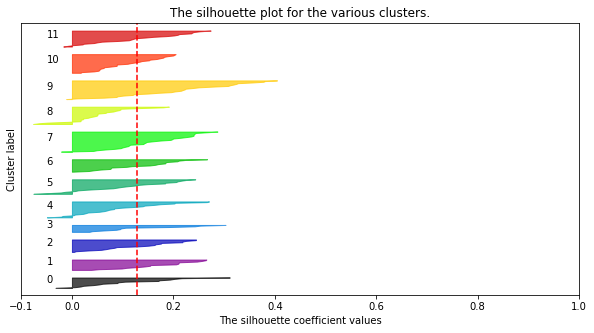

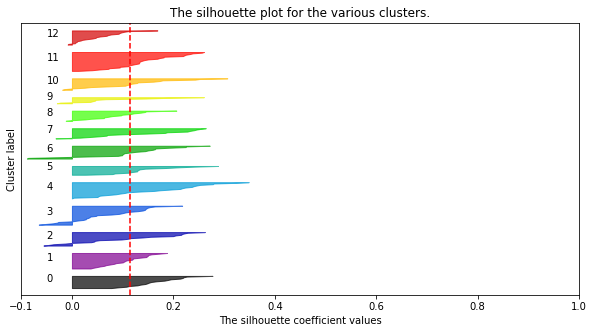

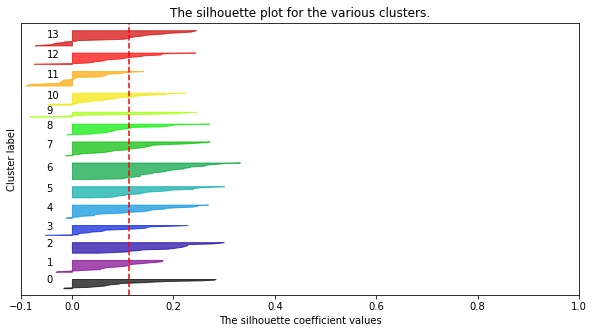

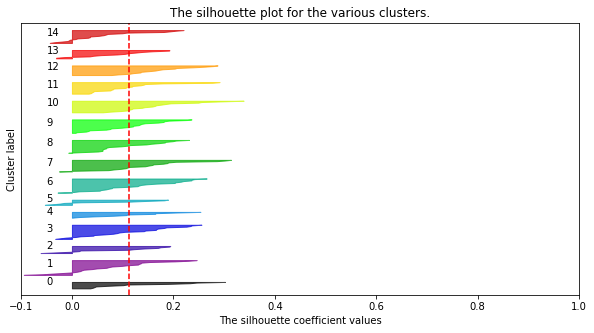

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import numpy as np
range_n_clusters = range(2, 16)
labels = {}
for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(10, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(results) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(results)
    labels[n_clusters] = cluster_labels
    silhouette_avg = silhouette_score(results, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(results, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


In [107]:
#Based on the sillhouette plots and sillhouette scores, 8 or 12 clusters seem to be the best fits for the Data
groups = pd.DataFrame(labels[10], index = results.index).groupby(0)
print(groups.groups)
# for name, group in groups:
#     print(group.join)
# 2 Most common positions in each group


{0: Index(['Alex Abrines', 'Allen Crabbe', 'Bojan Bogdanovic', 'Darius Miller',
       'Doug McDermott', 'Doug McDermott', 'Eric Gordon', 'Evan Fournier',
       'Gary Harris', 'Jodie Meeks', 'Joe Harris', 'Josh Hart',
       'Justin Holiday', 'Justin Jackson', 'Klay Thompson', 'Kyle Korver',
       'Marco Belinelli', 'Marco Belinelli', 'Nick Young', 'OG Anunoby',
       'Pat Connaughton', 'Reggie Bullock', 'Tony Snell', 'Trevor Ariza',
       'Troy Daniels', 'Wayne Ellington'],
      dtype='object'), 1: Index(['Chris Paul', 'Damian Lillard', 'Eric Bledsoe', 'Eric Bledsoe',
       'James Harden', 'Kemba Walker', 'Kyrie Irving', 'LeBron James',
       'Russell Westbrook', 'Stephen Curry', 'Tyreke Evans'],
      dtype='object'), 2: Index(['Andre Iguodala', 'Corey Brewer', 'David Nwaba', 'Draymond Green',
       'Gorgui Dieng', 'JaMychal Green', 'James Johnson', 'Jarell Martin',
       'Jeff Green', 'Justise Winslow', 'Kyle Anderson', 'Luc Mbah a Moute',
       'Maurice Harkless', 'Maxi K

In [117]:
#most common position in each cluster:
for group in groups.groups:
    #print(groups.groups[group])
    print(group)
    print(pos[groups.groups[group]].value_counts())
    #print(results.loc[groups.groups[group]].sum())

0
SG    17
SF     9
Name: Pos, dtype: int64
1
PG    9
PF    1
SG    1
Name: Pos, dtype: int64
2
PF       10
SF        7
C         3
SG        2
SF-SG     1
Name: Pos, dtype: int64
3
C     16
PF    10
SF     1
Name: Pos, dtype: int64
4
C     26
PF     4
Name: Pos, dtype: int64
5
PF    23
SF     7
SG     2
C      1
Name: Pos, dtype: int64
6
PG    27
SG     3
SF     1
Name: Pos, dtype: int64
7
SG    19
SF    11
PF     5
PG     1
Name: Pos, dtype: int64
8
PG    19
SG     1
Name: Pos, dtype: int64
9
SG    18
PF     3
SF     3
PG     2
Name: Pos, dtype: int64
